In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#za distance matrix
from scipy.spatial.distance import squareform, pdist

In [3]:
bikesTrain = pd.read_csv("./bikes/train.csv")
bikesTrain.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bikesTest = pd.read_csv("./bikes/test.csv")
bikesTest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
sample = pd.read_csv("./bikes/sampleSubmission.csv")
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
trip = pd.read_csv("./sf/trip.csv")
trip.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [7]:
#duration - dat je u sekundatama
#vidimo po min i max da je najkraca voznja bila 60 sekundi a najduza 200 dana
#ogranicavamo se na voznju izmedju 5 i 60 minuta

In [9]:
trip.min(axis=0)

id                             4069
duration                         60
start_date            1/1/2014 0:14
start_station_name    2nd at Folsom
start_station_id                  2
end_date              1/1/2014 0:21
end_station_name      2nd at Folsom
end_station_id                    2
bike_id                           9
subscription_type          Customer
zip_code                        inf
dtype: object

In [10]:
trip.max(axis=0)

id                                                           913460
duration                                                   17270400
start_date                                            9/9/2014 9:59
start_station_name    Yerba Buena Center of the Arts (3rd @ Howard)
start_station_id                                                 84
end_date                                              9/9/2014 9:59
end_station_name      Yerba Buena Center of the Arts (3rd @ Howard)
end_station_id                                                   84
bike_id                                                         878
subscription_type                                        Subscriber
zip_code                                                      v6z2x
dtype: object

In [11]:
tripSort = trip.sort_values(by=['id'], ascending=True)

In [12]:
tripSort.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
32,4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597


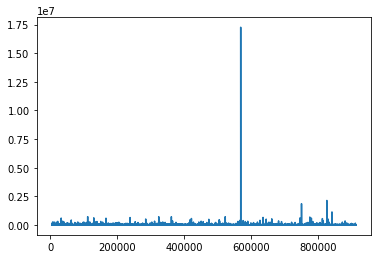

In [13]:
plt.plot(tripSort['id'], tripSort['duration'])

In [14]:
tripSort.shape

(669959, 11)

In [15]:
tripNoOutliers = tripSort[tripSort.duration < 3600]

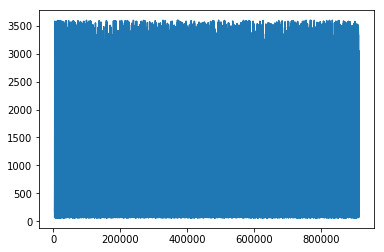

In [16]:
plt.plot(tripNoOutliers['id'], tripNoOutliers['duration'])

In [17]:
tripNoOutliers = tripNoOutliers[tripNoOutliers.duration > 300]

In [18]:
tripNoOutliers.shape

(523202, 11)

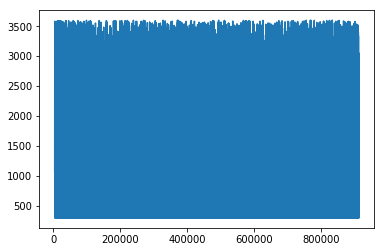

In [19]:
plt.plot(tripNoOutliers['id'], tripNoOutliers['duration'])

In [20]:
#sada su izbaceni svi outlieri, sto se duration atributa tice
#Finalni dataframe - tripNoOutliers

In [21]:
#pravimo kolonu koja oznacava dan u nedelji
#a zatim dodeljeujemo 1 ako je radni dan i 0 ako je neradni dan

In [22]:
tripNoOutliers['day_of_week'] = pd.to_datetime(tripNoOutliers['start_date']).dt.weekday_name
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,Thursday
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,Thursday
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,Thursday
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,Thursday
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,Thursday


In [23]:
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Saturday', 'day_of_week'] = 0
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Sunday', 'day_of_week'] = 0
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Monday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Tuesday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Wednesday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Thursday', 'day_of_week'] = 1
tripNoOutliers.loc[tripNoOutliers.day_of_week == 'Friday', 'day_of_week'] = 1

In [24]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1


In [25]:
#izbacujemo nedostajuce vrednosti

In [26]:
tripNoOutliers.isnull().sum()

id                       0
duration                 0
start_date               0
start_station_name       0
start_station_id         0
end_date                 0
end_station_name         0
end_station_id           0
bike_id                  0
subscription_type        0
zip_code              4910
day_of_week              0
dtype: int64

In [27]:
tripNoOutliers = tripNoOutliers.dropna(subset = ['zip_code'])

In [28]:
tripNoOutliers.isnull().sum()

id                    0
duration              0
start_date            0
start_station_name    0
start_station_id      0
end_date              0
end_station_name      0
end_station_id        0
bike_id               0
subscription_type     0
zip_code              0
day_of_week           0
dtype: int64

In [29]:
tripNoOutliers['time_of_day'] = pd.to_datetime(tripNoOutliers['start_date']).dt.hour

In [30]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1,9
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1,9
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1,9
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1,9
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1,9


In [31]:
#mozda bi bilo bolje malo ispraviti ovo?
#ali ideja je da sate kad je voznja pocela grupisemo u kategorije

In [32]:
tripNoOutliers['time_of_day'] = pd.cut(tripNoOutliers['time_of_day'], [0, 6, 12, 18, 24], labels=['early_morning', 'rush_hour', 'noon', 'night'])


In [33]:
tripNoOutliers.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day
541,4073,1067,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:42,San Francisco Caltrain 2 (330 Townsend),69,321,Subscriber,94703,1,rush_hour
570,4074,1131,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,317,Subscriber,94115,1,rush_hour
565,4075,1117,8/29/2013 9:24,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,316,Subscriber,94122,1,rush_hour
566,4076,1118,8/29/2013 9:25,South Van Ness at Market,66,8/29/2013 9:43,San Francisco Caltrain 2 (330 Townsend),69,322,Subscriber,94597,1,rush_hour
514,4079,995,8/29/2013 9:35,South Van Ness at Market,66,8/29/2013 9:52,South Van Ness at Market,66,327,Subscriber,94102,1,rush_hour


In [34]:
tripNoOutliers = tripNoOutliers.dropna(subset=['time_of_day']);

In [35]:
tripNoOutliers.isnull().sum()

id                    0
duration              0
start_date            0
start_station_name    0
start_station_id      0
end_date              0
end_station_name      0
end_station_id        0
bike_id               0
subscription_type     0
zip_code              0
day_of_week           0
time_of_day           0
dtype: int64

In [36]:
station = pd.read_csv("./sf/station.csv")
station.head()

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [37]:
#racunamo mean euklidsko rastojanje za svaku stanicu od svih drugih

In [38]:
distanceColumns = station[['name', 'lat', 'long']]

In [39]:
distanceColumns.head()

,name,lat,long
0,San Jose Diridon Caltrain Station,37.329732,-121.901782
1,San Jose Civic Center,37.330698,-121.888979
2,Santa Clara at Almaden,37.333988,-121.894902
3,Adobe on Almaden,37.331415,-121.893200
4,San Pedro Square,37.336721,-121.894074


In [40]:
distanceMatrix = pd.DataFrame(squareform(pdist(distanceColumns.iloc[:, 1:])), columns=distanceColumns.name.unique(), index=distanceColumns.name.unique())

In [41]:
distanceMatrix

,San Jose Diridon Caltrain Station,San Jose Civic Center,Santa Clara at Almaden,Adobe on Almaden,San Pedro Square,Paseo de San Antonio,San Salvador at 1st,Japantown,San Jose City Hall,MLK Library,...,Civic Center BART (7th at Market),Grant Avenue at Columbus Avenue,Steuart at Market,Mechanics Plaza (Market at Battery),Market at 4th,Market at Sansome,Santa Clara County Civic Center,Broadway St at Battery St,Mezes Park,Ryland Park
San Jose Diridon Caltrain Station,0.000000,0.012839,0.008090,0.008745,0.010405,0.015386,0.015957,0.020281,0.016653,0.017256,...,0.680987,0.689389,0.677038,0.678470,0.679451,0.678625,0.023208,0.684736,0.371419,0.014381
San Jose Civic Center,0.012839,0.000000,0.006775,0.004281,0.007889,0.003709,0.003193,0.018934,0.006981,0.006158,...,0.689996,0.698183,0.685757,0.687261,0.688346,0.687449,0.027576,0.693470,0.382582,0.013737
Santa Clara at Almaden,0.008090,0.006775,0.000000,0.003085,0.002856,0.007961,0.009844,0.014755,0.008608,0.009435,...,0.683363,0.691583,0.679169,0.680662,0.681730,0.680844,0.021535,0.686881,0.375826,0.008766
Adobe on Almaden,0.008745,0.004281,0.003085,0.000000,0.005378,0.006695,0.007474,0.017393,0.008615,0.008765,...,0.686334,0.694573,0.682165,0.683652,0.684711,0.683831,0.024615,0.689875,0.378452,0.011565
San Pedro Square,0.010405,0.007889,0.002856,0.005378,0.000000,0.007707,0.010532,0.012038,0.007111,0.008455,...,0.682206,0.690366,0.677932,0.679444,0.680541,0.679636,0.019700,0.685647,0.375444,0.006199
Paseo de San Antonio,0.015386,0.003709,0.007961,0.006695,0.007707,0.000000,0.003799,0.016844,0.003593,0.002450,...,0.689525,0.697626,0.685172,0.686704,0.687830,0.686905,0.026582,0.692892,0.383147,0.012447
San Salvador at 1st,0.015957,0.003193,0.009844,0.007474,0.010532,0.003799,0.000000,0.020592,0.007319,0.005723,...,0.692731,0.700879,0.688439,0.689957,0.691061,0.690151,0.029991,0.696156,0.385664,0.015922
Japantown,0.020281,0.018934,0.014755,0.017393,0.012038,0.016844,0.020592,0.000000,0.013727,0.015726,...,0.673946,0.681901,0.669401,0.670979,0.672174,0.671201,0.011674,0.677129,0.370066,0.006084
San Jose City Hall,0.016653,0.006981,0.008608,0.008615,0.007111,0.003593,0.007319,0.013727,0.000000,0.002013,...,0.687160,0.695199,0.682725,0.684277,0.685433,0.684487,0.024134,0.690448,0.381636,0.010139
MLK Library,0.017256,0.006158,0.009435,0.008765,0.008455,0.002450,0.005723,0.015726,0.002013,0.000000,...,0.689152,0.697197,0.684725,0.686275,0.687428,0.686484,0.026122,0.692448,0.383466,0.012080


In [42]:
meanDistances = distanceMatrix.mean(axis=0)

In [43]:
meanDistances = pd.DataFrame({'name':meanDistances.index, 'meanDistance':meanDistances.values})

In [44]:
meanDistances.head()

,meanDistance,name
0,0.417585,San Jose Diridon Caltrain Station
1,0.424051,San Jose Civic Center
2,0.418832,Santa Clara at Almaden
3,0.421076,Adobe on Almaden
4,0.418108,San Pedro Square


In [45]:
test = tripNoOutliers

In [46]:
# meanDistances.sort_values(by=['name'], ascending=False)

In [47]:
test = test.sort_values(by=['start_station_name'], ascending=True)

In [48]:
meanDistances = meanDistances.sort_values(by=['name'], ascending=True)

In [49]:
test['start_station_id_distance'] = ''

In [50]:
test['end_station_id_distance'] = ''

In [51]:
test.loc[test['start_station_name'] == 'Washington at Kearny', 'start_station_name'] = 'Washington at Kearney'
test.loc[test['end_station_name'] == 'Washington at Kearny', 'end_station_name'] = 'Washington at Kearney'

In [52]:
for row1 in test.itertuples():
    for row2 in meanDistances.itertuples():
        if row1[4] == row2[2]:
            test.at[row1[0], 'start_station_id_distance'] = row2[1]
        if row1[7] == row2[2]:
            test.at[row1[0], 'end_station_id_distance'] = row2[1]

In [53]:
test.head()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,464444,388,9/22/2014 17:43,2nd at Folsom,62,9/22/2014 17:49,San Francisco Caltrain (Townsend at 4th),70,621,Subscriber,94086,1,noon,0.274358,0.273022
79342,109725,608,11/27/2013 13:16,2nd at Folsom,62,11/27/2013 13:26,Clay at Battery,41,601,Subscriber,94107,1,noon,0.274358,0.27931
212568,337792,407,6/24/2014 18:10,2nd at Folsom,62,6/24/2014 18:17,San Francisco Caltrain (Townsend at 4th),70,360,Subscriber,94070,1,noon,0.274358,0.273022
79347,109730,329,11/27/2013 13:21,2nd at Folsom,62,11/27/2013 13:27,San Francisco Caltrain 2 (330 Townsend),69,419,Subscriber,94117,1,noon,0.274358,0.273057
428253,766428,387,5/14/2015 8:06,2nd at Folsom,62,5/14/2015 8:12,San Francisco Caltrain (Townsend at 4th),70,611,Subscriber,94107,1,rush_hour,0.274358,0.273022


In [54]:
tripPreprocessed = test

In [55]:
tripPreprocessed = tripPreprocessed.drop(columns=['start_station_name', 'end_station_name'])

In [56]:
tripPreprocessed.head()

,id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,464444,388,9/22/2014 17:43,62,9/22/2014 17:49,70,621,Subscriber,94086,1,noon,0.274358,0.273022
79342,109725,608,11/27/2013 13:16,62,11/27/2013 13:26,41,601,Subscriber,94107,1,noon,0.274358,0.27931
212568,337792,407,6/24/2014 18:10,62,6/24/2014 18:17,70,360,Subscriber,94070,1,noon,0.274358,0.273022
79347,109730,329,11/27/2013 13:21,62,11/27/2013 13:27,69,419,Subscriber,94117,1,noon,0.274358,0.273057
428253,766428,387,5/14/2015 8:06,62,5/14/2015 8:12,70,611,Subscriber,94107,1,rush_hour,0.274358,0.273022


In [58]:
# status = pd.read_csv("./sf/status.csv")
# status.head()

In [59]:
weather = pd.read_csv("./sf/weather.csv")
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


In [60]:
weather = weather.sort_values(by=['events'])

In [61]:
# weather.isnull().sum()

In [62]:
# weather = weather.dropna(subset=['max_gust_speed_mph', 'max_dew_point_f', 'max_visibility_miles'])

In [63]:
# weather.isnull().sum()

In [64]:
weather.events.unique()

array(['Fog', 'Fog-Rain', 'Rain', 'Rain-Thunderstorm', 'rain', nan],
      dtype=object)

In [65]:
#nan oznacava nepostojanje nikakvog dogadjaja - dakle, bilo je suncano!
#0 - sunny, 1 - foggy, 2 - rainy, 3 - foggy and rainy, 4 - rainy with thunders

In [66]:
weather.loc[weather.events.isnull(), 'events'] = 0
weather.loc[weather.events == 'Fog', 'events'] = 1
weather.loc[weather.events == 'Rain', 'events'] = 2
weather.loc[weather.events == 'Fog-Rain', 'events'] = 3
weather.loc[weather.events == 'Rain-Thunderstorm', 'events'] = 4

In [67]:
#60-80F je najbolja temperatura za bajs
#vise od 80F je bilo samo za 5 dana, pa to brisemo, da ne bismo imali posebnu kategoriju

In [68]:
(weather.mean_temperature_f > 80).sum()

5

In [69]:
weather = weather[weather.mean_temperature_f <= 80]

In [70]:
(weather.mean_temperature_f < 60).sum()

1462

In [71]:
#dodelicemo dve kategorije - jedna kad je ispod 60 i kad je izmedju 60 i 80

In [72]:
weather['temp_category'] = '';

In [73]:
weather.loc[weather.mean_temperature_f < 60, 'temp_category'] = 'less'
weather.loc[weather.mean_temperature_f >= 60, 'temp_category'] = 'between'

In [74]:
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,temp_category
14,9/12/2013,71.0,65.0,59.0,58.0,57.0,55.0,84.0,73.0,61.0,...,9.0,25.0,11.0,30.0,0,7.0,1,268.0,94107,between
1976,1/15/2015,59.0,50.0,40.0,49.0,45.0,39.0,100.0,84.0,67.0,...,0.0,13.0,4.0,16.0,0,5.0,1,287.0,94107,less
1979,1/18/2015,65.0,57.0,49.0,55.0,52.0,48.0,100.0,87.0,73.0,...,0.0,13.0,4.0,14.0,0,6.0,1,302.0,94107,less
1981,1/20/2015,58.0,52.0,45.0,49.0,47.0,42.0,100.0,86.0,72.0,...,0.0,7.0,2.0,NaN,0,2.0,1,282.0,94107,less
536,2/13/2014,70.0,60.0,49.0,56.0,51.0,46.0,100.0,82.0,63.0,...,0.0,12.0,3.0,26.0,0,3.0,1,351.0,94301,between


In [75]:
#sad treba ovo spojiti

In [76]:
tripPreprocessed.head()

,id,duration,start_date,start_station_id,end_date,end_station_id,bike_id,subscription_type,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,464444,388,9/22/2014 17:43,62,9/22/2014 17:49,70,621,Subscriber,94086,1,noon,0.274358,0.273022
79342,109725,608,11/27/2013 13:16,62,11/27/2013 13:26,41,601,Subscriber,94107,1,noon,0.274358,0.27931
212568,337792,407,6/24/2014 18:10,62,6/24/2014 18:17,70,360,Subscriber,94070,1,noon,0.274358,0.273022
79347,109730,329,11/27/2013 13:21,62,11/27/2013 13:27,69,419,Subscriber,94117,1,noon,0.274358,0.273057
428253,766428,387,5/14/2015 8:06,62,5/14/2015 8:12,70,611,Subscriber,94107,1,rush_hour,0.274358,0.273022


In [77]:
tripPreprocessed = tripPreprocessed.drop(columns=['start_station_id', 'end_station_id', 'bike_id', 'subscription_type', 'id', 'end_date'])

In [78]:
tripPreprocessed.head()

,duration,start_date,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,388,9/22/2014 17:43,94086,1,noon,0.274358,0.273022
79342,608,11/27/2013 13:16,94107,1,noon,0.274358,0.27931
212568,407,6/24/2014 18:10,94070,1,noon,0.274358,0.273022
79347,329,11/27/2013 13:21,94117,1,noon,0.274358,0.273057
428253,387,5/14/2015 8:06,94107,1,rush_hour,0.274358,0.273022


In [82]:
# tripPreprocessed['temp_category'] = ''
# tripPreprocessed['mean_dew_point_f'] = ''
# tripPreprocessed['mean_humidity'] = ''
# tripPreprocessed['mean_visibility_miles'] = ''
# tripPreprocessed['mean_wind_speed_mph'] = ''
# tripPreprocessed['precipitation_inches'] = ''
# tripPreprocessed['cloud_cover'] = ''

# tripPreprocessed = tripPreprocessed.drop(columns = ['temp_category', 'mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover'])

In [ ]:
#ovo traje beskonacno, sigurno ima nesto pametnije..

In [83]:
# for row1 in tripPreprocessed.itertuples():
#     row1date = pd.to_datetime(row1[2]).date()
#     for row2 in weather.itertuples():
#         if (row1date == row2[1]) and (row1[3] == row2[24]):
#             tripPreprocessed['temp_category'] = weather.at[row2[0], 'temp_category']
#             tripPreprocessed['mean_dew_point_f'] = weather.at[row2[0], 'mean_dew_point_f']
#             tripPreprocessed['mean_humidity'] = weather.at[row2[0], 'mean_humidity']
#             tripPreprocessed['mean_visibility_miles'] = weather.at[row2[0], 'mean_visibility_miles']
#             tripPreprocessed['mean_wind_speed_mph'] = weather.at[row2[0], 'mean_wind_speed_mph']
#             tripPreprocessed['precipitation_inches'] = weather.at[row2[0], 'precipitation_inches']
#             tripPreprocessed['cloud_cover'] = weather.at[row2[0], 'cloud_cover']

In [109]:
testWeather = weather[['zip_code', 'date', 'temp_category', 'mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover']]

In [113]:
testWeather.head()

,zip_code,date,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
14,94107,9/12/2013,between,57.0,73.0,10.0,11.0,0,7.0
1976,94107,1/15/2015,less,45.0,84.0,4.0,4.0,0,5.0
1979,94107,1/18/2015,less,52.0,87.0,5.0,4.0,0,6.0
1981,94107,1/20/2015,less,47.0,86.0,6.0,2.0,0,2.0
536,94301,2/13/2014,between,51.0,82.0,8.0,3.0,0,3.0


In [158]:
testTrip = tripPreprocessed

In [89]:
testTrip.head()

,duration,start_date,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,388,9/22/2014 17:43,94086,1,noon,0.274358,0.273022
79342,608,11/27/2013 13:16,94107,1,noon,0.274358,0.27931
212568,407,6/24/2014 18:10,94070,1,noon,0.274358,0.273022
79347,329,11/27/2013 13:21,94117,1,noon,0.274358,0.273057
428253,387,5/14/2015 8:06,94107,1,rush_hour,0.274358,0.273022


In [159]:
testTrip['start_date'] = pd.to_datetime(testTrip['start_date']).dt.date

In [160]:
testTrip['start_date'] = pd.to_datetime(testTrip['start_date']).dt.strftime('%-m/%-d/%Y')

In [101]:
testTrip.head()

,duration,start_date,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance
647149,388,9/22/2014,94086,1,noon,0.274358,0.273022
79342,608,11/27/2013,94107,1,noon,0.274358,0.27931
212568,407,6/24/2014,94070,1,noon,0.274358,0.273022
79347,329,11/27/2013,94117,1,noon,0.274358,0.273057
428253,387,5/14/2015,94107,1,rush_hour,0.274358,0.273022


In [176]:
testTrip['zip_code'] = pd.to_numeric(testTrip['zip_code'], errors='coerce')

In [183]:
testTrip = testTrip.dropna(subset=['zip_code'])

In [184]:
testTrip.isnull().sum()

duration                     0
start_date                   0
zip_code                     0
day_of_week                  0
time_of_day                  0
start_station_id_distance    0
end_station_id_distance      0
dtype: int64

In [185]:
(testTrip['zip_code'] == 0).sum()

62

In [187]:
testTrip = testTrip[testTrip.zip_code != 0]

In [188]:
(testTrip['zip_code'] == 0).sum()

0

In [191]:
testTrip['zip_code'] = testTrip['zip_code'].astype('int64')

In [192]:
testTrip.dtypes

duration                        int64
start_date                     object
zip_code                        int64
day_of_week                     int64
time_of_day                  category
start_station_id_distance      object
end_station_id_distance        object
dtype: object

In [121]:
testWeather.dtypes

zip_code                   int64
date                      object
temp_category             object
mean_dew_point_f         float64
mean_humidity            float64
mean_visibility_miles    float64
mean_wind_speed_mph      float64
precipitation_inches      object
cloud_cover              float64
dtype: object

In [195]:
mergeRes = pd.merge(left=testTrip, right=testWeather, how='left', left_on=['start_date', 'zip_code'], right_on=['date', 'zip_code'])

In [196]:
mergeRes.isnull().sum()

duration                          0
start_date                        0
zip_code                          0
day_of_week                       0
time_of_day                       0
start_station_id_distance         0
end_station_id_distance           0
date                         441212
temp_category                441212
mean_dew_point_f             441389
mean_humidity                441389
mean_visibility_miles        441281
mean_wind_speed_mph          441212
precipitation_inches         441212
cloud_cover                  441212
dtype: int64

In [197]:
mergeRes.shape

(508684, 15)

In [198]:
testTrip.shape

(508684, 7)

In [201]:
mergeRes.head()

,duration,start_date,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance,date,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
0,388,9/22/2014,94086,1,noon,0.274358,0.273022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,608,11/27/2013,94107,1,noon,0.274358,0.27931,11/27/2013,less,45.0,69.0,9.0,1.0,0,5.0
2,407,6/24/2014,94070,1,noon,0.274358,0.273022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,329,11/27/2013,94117,1,noon,0.274358,0.273057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,387,5/14/2015,94107,1,rush_hour,0.274358,0.273022,5/14/2015,between,48.0,67.0,10.0,9.0,T,7.0


In [203]:
mergeRes = mergeRes.dropna(subset=['date', 'temp_category', 'mean_dew_point_f', 'mean_humidity', 'mean_visibility_miles', 'mean_wind_speed_mph', 'precipitation_inches', 'cloud_cover'])

In [204]:
mergeRes.shape

(67226, 15)

In [205]:
mergeRes.head()

,duration,start_date,zip_code,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance,date,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
1,608,11/27/2013,94107,1,noon,0.274358,0.27931,11/27/2013,less,45.0,69.0,9.0,1.0,0,5.0
4,387,5/14/2015,94107,1,rush_hour,0.274358,0.273022,5/14/2015,between,48.0,67.0,10.0,9.0,T,7.0
5,1207,5/14/2015,94107,1,rush_hour,0.274358,0.287692,5/14/2015,between,48.0,67.0,10.0,9.0,T,7.0
10,662,11/27/2013,94107,1,noon,0.274358,0.275123,11/27/2013,less,45.0,69.0,9.0,1.0,0,5.0
17,343,11/28/2013,94107,1,rush_hour,0.274358,0.273022,11/28/2013,less,44.0,64.0,9.0,4.0,0,3.0


In [206]:
mergeRes = mergeRes.drop(columns=['start_date', 'zip_code', 'date'])

In [207]:
mergeRes.head()

,duration,day_of_week,time_of_day,start_station_id_distance,end_station_id_distance,temp_category,mean_dew_point_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,cloud_cover
1,608,1,noon,0.274358,0.27931,less,45.0,69.0,9.0,1.0,0,5.0
4,387,1,rush_hour,0.274358,0.273022,between,48.0,67.0,10.0,9.0,T,7.0
5,1207,1,rush_hour,0.274358,0.287692,between,48.0,67.0,10.0,9.0,T,7.0
10,662,1,noon,0.274358,0.275123,less,45.0,69.0,9.0,1.0,0,5.0
17,343,1,rush_hour,0.274358,0.273022,less,44.0,64.0,9.0,4.0,0,3.0


In [209]:
mergeRes.to_csv('preprocessedData.csv', index=False)